# Pixelate an image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

The goal of this exercise is to pixelate an image. The pixelation is done by replacing each pixel by the average of the pixels in a square of size `n` around it. The size of the square is given by the user.

In [2]:
def ImgSize(img):
    return [img.shape, img.size, img.dtype]

In [23]:
def pixelate(img, w, h):
    # Get input size
    height, width = img.shape[:2]

    # Resize input to "pixelated" size
    temp = cv2.resize(src = img, dsize=(w, h), interpolation=cv2.INTER_LINEAR)
    resizeinfo = ImgSize(temp)

    # resize back to original size using NEAREST NEIGHBOR
    output = cv2.resize(temp, (width, height), interpolation=cv2.INTER_NEAREST)

    return output , resizeinfo

In [4]:
def plot_images(images, titles, rows, cols , info):
    fig = plt.figure(figsize=(20, 10))
    for i in range(rows * cols):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.text(0.5, 0.5, info[i], fontsize=10, color='black', ha='left', va='top')
        ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        ax.set_title(titles[i])
        ax.axis('off')
    plt.show()

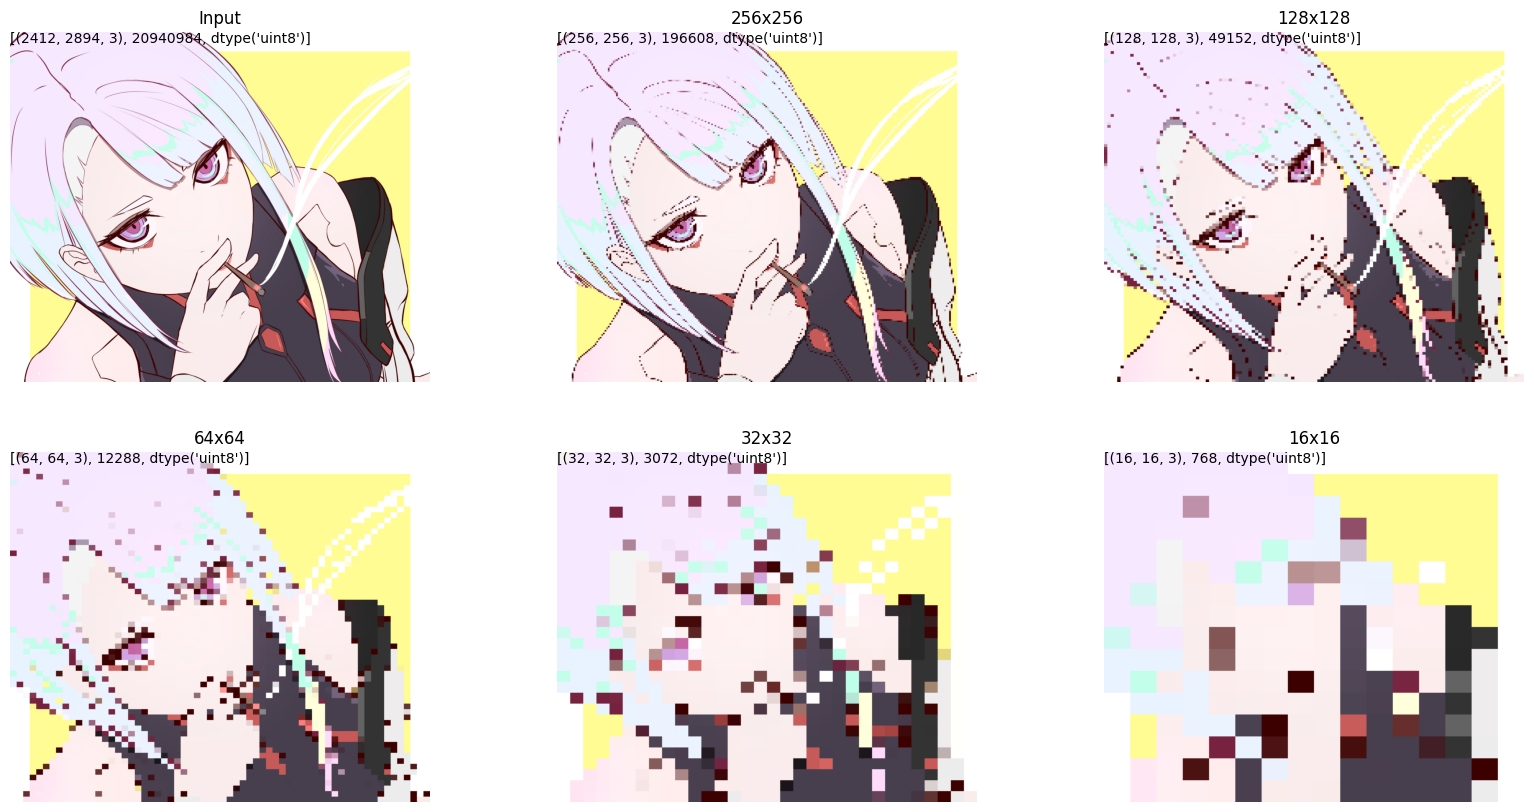

In [24]:
# Input image
input = cv2.imread('../img/lucy.jpg')
inputsize = ImgSize(input)

# Pixelate input
output256, resize256 = pixelate(input, 256, 256)
output128, resize128  = pixelate(input, 128, 128)
output64, resize64 = pixelate(input, 64, 64)
output32, resize32 = pixelate(input, 32, 32)
output16, resize16 = pixelate(input, 16, 16)

# Display input and output
images = [input, output256, output128, output64, output32, output16]
titles = ['Input', '256x256', '128x128', '64x64', '32x32', '16x16']
info = [inputsize, resize256, resize128, resize64, resize32, resize16]
plot_images(images, titles, 2, 3, info)


# Conclusion

The image after pixelation is smaller than the original. if the pixelation is done with a square of size that is too small, the image will be very pixelated and will loose a lot of details. If the pixelation is done with a square of size that is too big, the image will not be pixelated enough and will not loose enough details.